In [1]:
# Bibliotecas para manipulacao das planilhas
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Para normalizar (Recomendado para kNN)
from sklearn.model_selection import GridSearchCV # Para melhorar busca por parametros (Radom Foreste)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filePath = f'planilha_final.csv'
df = pd.read_csv(filePath, sep=';', decimal=',', encoding='latin1')

MACHINE LEARNING - Divisão de dados

In [40]:
# Criar uma cópia do DataFrame para evitar modificações no original
df_ml = df.copy()

df_ml = df_ml.drop(columns=["DATA", "HORA", "nesterov"])

# Definir variáveis preditoras (X) e alvo (y)
X = df_ml.drop(columns=["faixa_risco"])  # Removendo apenas a variável alvo
y = df_ml["faixa_risco"]

# Dividir os dados em treino (80%) e teste (20%) com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir informações sobre os conjuntos criados
print(f"Tamanho do Conjunto de Treino: {X_train.shape[0]} registros")
print(f"Tamanho do Conjunto de Teste: {X_test.shape[0]} registros")

Tamanho do Conjunto de Treino: 4091 registros
Tamanho do Conjunto de Teste: 1023 registros


MACHINE LEARNING - kNN

In [43]:
# Criar um objeto de normalização
scaler = StandardScaler()

# Ajustar e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste com os mesmos parâmetros do treino
X_test_scaled = scaler.transform(X_test)

print("Dados normalizados com sucesso!")

Dados normalizados com sucesso!


In [47]:
# Criar o modelo kNN com k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Treinar o modelo com os dados normalizados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
# Fazer previsões no conjunto de teste
y_pred_knn = knn.predict(X_test_scaled)

In [49]:
# Avaliar o modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do kNN: {accuracy_knn:.4f}")

Acurácia do kNN: 0.7840


In [50]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       276
           1       0.69      0.61      0.65       241
           2       0.79      0.79      0.79       332
           3       0.85      0.83      0.84       174

    accuracy                           0.78      1023
   macro avg       0.78      0.78      0.78      1023
weighted avg       0.78      0.78      0.78      1023



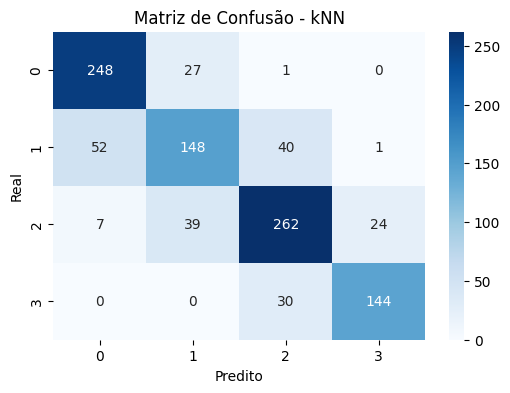

In [51]:
# Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - kNN")
plt.show()

MACHINE LEARNING - Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Treinar o modelo
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
# Avaliar o desempenho do Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.4f}")

Acurácia do Random Forest: 0.8573


In [ ]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       276
           1       0.82      0.75      0.78       241
           2       0.82      0.88      0.85       332
           3       0.89      0.85      0.87       174

    accuracy                           0.86      1023
   macro avg       0.86      0.85      0.86      1023
weighted avg       0.86      0.86      0.86      1023



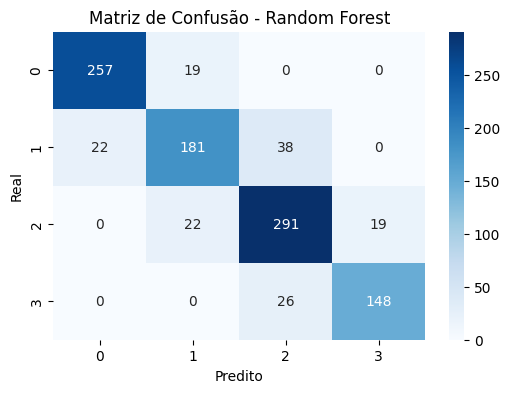

In [ ]:
# Criar matriz de confusão para o melhor modelo (exemplo: Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

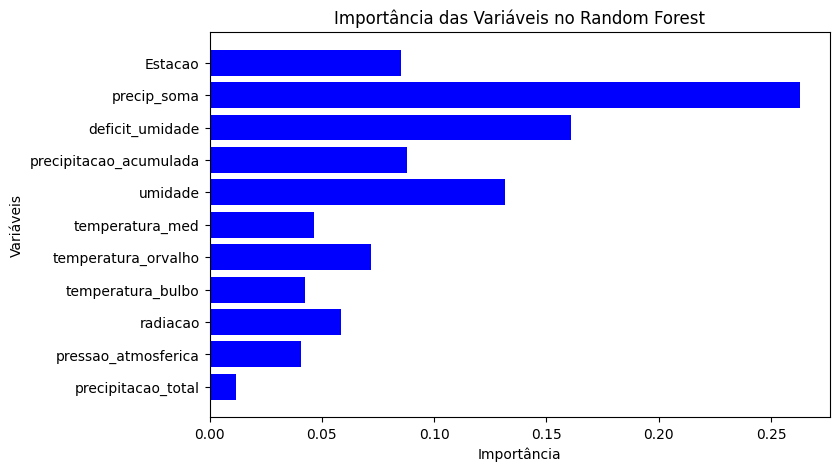

In [ ]:
# Obter importância das variáveis
importances = rf.feature_importances_
features = X_train.columns

# Plotar a importância das variáveis
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="blue")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()

In [52]:
rf_optimized = RandomForestClassifier(
    n_estimators=200,  # Mais árvores = melhor precisão
    max_depth=10,  # Limita a complexidade das árvores
    min_samples_split=5,  # Evita overfitting
    random_state=42
)

In [53]:
rf_optimized.fit(X_train_scaled, y_train)
y_pred_rf_opt = rf_optimized.predict(X_test_scaled)

In [54]:
# Avaliar o modelo otimizado
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
print(f"Acurácia do Random Forest Otimizado: {accuracy_rf_opt:.4f}")

Acurácia do Random Forest Otimizado: 0.8641


In [55]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf_opt))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       276
           1       0.82      0.77      0.79       241
           2       0.83      0.88      0.86       332
           3       0.89      0.86      0.88       174

    accuracy                           0.86      1023
   macro avg       0.87      0.86      0.86      1023
weighted avg       0.86      0.86      0.86      1023



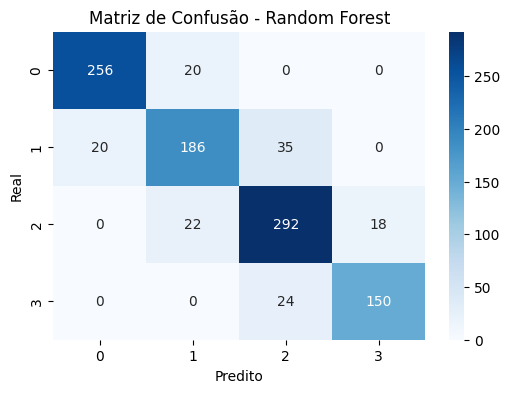

In [59]:
# Criar matriz de confusão para o melhor modelo (exemplo: Random Forest)
cm = confusion_matrix(y_test, y_pred_rf_opt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

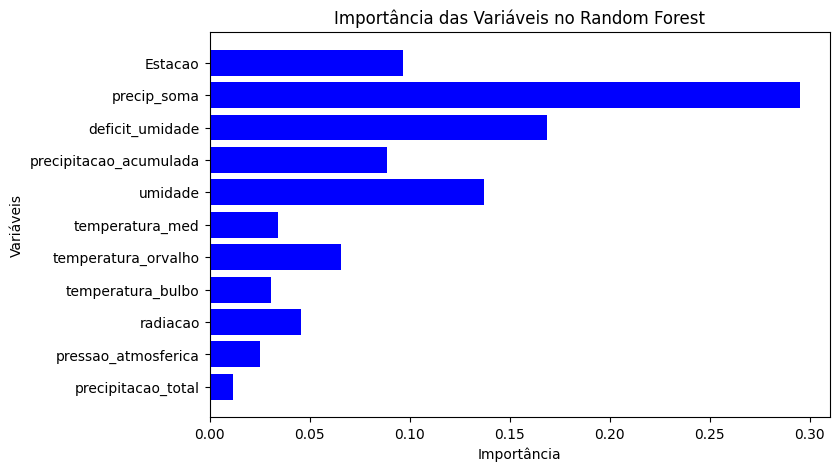

In [58]:
# Obter importância das variáveis
importances = rf_optimized.feature_importances_
features = X_train.columns

# Plotar a importância das variáveis
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="blue")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()

MACHINE LEARNING - SVM

In [74]:
# Criar o modelo SVM
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Treinar o modelo com os dados normalizados
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [75]:
# Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test_scaled)

In [76]:
# Avaliar o desempenho
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do SVM: {accuracy_svm:.4f}")

Acurácia do SVM: 0.8534


In [67]:
# Exibir relatório detalhado
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm))


 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       276
           1       0.71      0.70      0.70       241
           2       0.80      0.83      0.81       332
           3       0.86      0.81      0.83       174

    accuracy                           0.81      1023
   macro avg       0.81      0.80      0.81      1023
weighted avg       0.81      0.81      0.81      1023



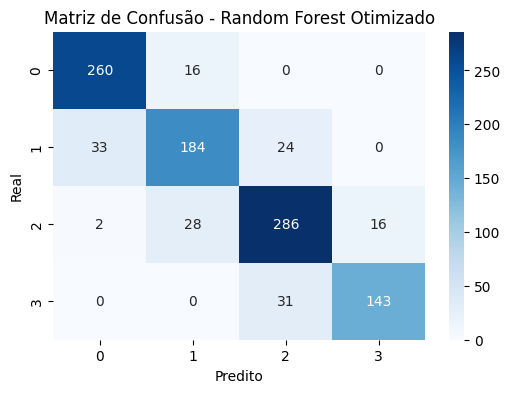

In [ ]:
# Criar matriz de confusão para o melhor modelo (exemplo: Random Forest)
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest Otimizado")
plt.show()

In [ ]:
# Criar dicionário com os resultados dos modelos
model_results = {
    "kNN": accuracy_knn,
    "Random Forest": accuracy_rf,
    "Radom Forest Otimizado": accuracy_rf_opt,
    "SVM": accuracy_svm
}

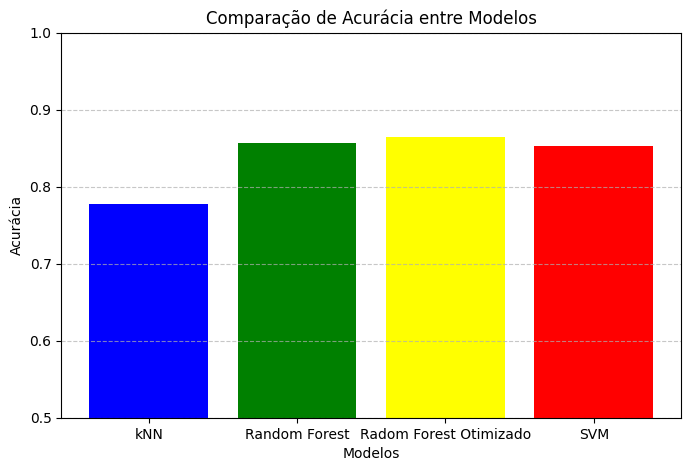

In [ ]:
# Criar gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(model_results.keys(), model_results.values(), color=["blue", "green", "yellow", "red"])
plt.xlabel("Modelos")
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre Modelos")
plt.ylim(0.5, 1)  # Ajustar escala do eixo Y para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()